# Local Election Data

## Analysis of elections within Allegheny County using Pandas

**This data was sourced from the publicly accessible "Unofficial Election Results" provided by the Allegheny County Elections Office.**

### Goal
The goal of this notebook/project is to create visual representations of election turnout and results in different races throughout Allegheny County, HD32, SD43, & Penn Hills.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from processor import Processor
import argparse
import collections
import csv
import numpy
import json
import glob
import math
import matplotlib
import os
import pandas
import re
import requests
import sklearn
import scipy
import string
import sys
import time
import xml

In [7]:
%matplotlib inline

#### Get the files for the data analysis

In [8]:
files = ['hd32_special23_detail.xls', 'allegheny_general23_detail.xls', 'allegheny_general22_detail.xls']
hd32_map = gpd.read_file("./Allegheny_Voting_Districts/Allegheny_County_Voting_District_Boundaries.shp")

#### Process the files

In [9]:
processor = Processor(files)

#### Get the turnouts table

In [10]:
turnouts = processor.get_turnouts_table()
turnouts['Voter Turnout'] = pd.to_numeric(turnouts['Voter Turnout'].str.replace('%', ''))
turnouts.head(10)

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout,Filename
0,Oakmont Dist 1,843,210,115,3,328,38.91,hd32_special23_detail.xls
1,Oakmont Dist 2,1038,187,160,2,349,33.62,hd32_special23_detail.xls
2,Oakmont Dist 3,750,161,79,3,243,32.40,hd32_special23_detail.xls
3,Oakmont Dist 4,849,156,96,1,253,29.80,hd32_special23_detail.xls
4,Oakmont Dist 5,645,128,65,2,195,30.23,hd32_special23_detail.xls
5,Oakmont Dist 6,1285,189,209,0,398,30.97,hd32_special23_detail.xls
6,Penn Hills Ward 1 Dist 1,684,56,122,2,180,26.32,hd32_special23_detail.xls
7,Penn Hills Ward 1 Dist 2,710,76,108,0,184,25.92,hd32_special23_detail.xls
8,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27,hd32_special23_detail.xls
9,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43,hd32_special23_detail.xls


#### Get the elections tables

In [11]:
elections = processor.get_elections_tables()
print(elections.keys())

hd32_special_breakdown = elections.get('hd32_special23_detail.xls')
#allegheny_general23_breakdown = elections.get('allegheny_general23_detail.xls')
#allegheny_general22_breakdown = elections.get('allegheny_general22_detail.xls')

dict_keys(['hd32_special23_detail.xls', 'allegheny_general23_detail.xls', 'allegheny_general22_detail.xls'])


In [12]:
# format the column names
hd32_special_breakdown.rename(columns={'Election Day': 'Election Day (DEM)', 'Election Day.1': 'Election Day (GOP)', 'Election Day.2': 'Election Day (Other)', 'Absentee': 'Absentee (DEM)', 'Absentee.1': 'Absentee (GOP)', 'Absentee.2': 'Absentee (Other)', 'Provisional': 'Provisional (DEM)', 'Provisional.1': 'Provisional (GOP)', 'Provisional.2': 'Provisional (Other)', 'Total Votes': 'Total Votes (DEM)', 'Total Votes.1': 'Total Votes (GOP)', 'Total Votes.2': 'Total Votes (Other)'}, inplace=True)

## Turnout Analysis

### 2022 General Election

In [13]:
# get only the rows that have 'allegheny_general22_detail.xls' as the Filename
allegheny_general22_turnout = turnouts[turnouts['Filename'] == 'allegheny_general22_detail.xls']
allegheny_general22_turnout = allegheny_general22_turnout.drop('Filename', axis=1).reset_index(drop=True)
allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Aleppo,1379,633,341,13,987,71.57
1,Aspinwall Dist 1,864,488,127,5,620,71.76
2,Aspinwall Dist 2,574,290,95,4,389,67.77
3,Aspinwall Dist 3,852,462,140,6,608,71.36
4,Avalon Ward 1,1094,454,150,11,615,56.22
...,...,...,...,...,...,...,...
1319,Wilkinsburg Ward 3 Dist 5,1023,318,147,8,473,46.24
1320,Wilkinsburg Ward 3 Dist 6,525,153,42,6,201,38.29
1321,Wilmerding Dist 1,481,102,48,2,152,31.60
1322,Wilmerding Dist 2,674,225,76,7,308,45.70


In [14]:
# get only Penn Hills wards/districts
ph_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].str.contains("Penn Hills")]
ph_general22_turnout = ph_general22_turnout.reset_index(drop=True)
ph_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 1 Dist 1,730,195,163,7,365,50.00
1,Penn Hills Ward 1 Dist 2,747,262,157,17,436,58.37
2,Penn Hills Ward 1 Dist 3,490,123,73,6,202,41.22
3,Penn Hills Ward 1 Dist 4,323,89,62,4,155,47.99
4,Penn Hills Ward 1 Dist 5,203,44,34,1,79,38.92
5,Penn Hills Ward 2 Dist 1,710,246,143,9,398,56.06
6,Penn Hills Ward 2 Dist 2,735,230,105,5,340,46.26
7,Penn Hills Ward 2 Dist 3,823,298,147,8,453,55.04
8,Penn Hills Ward 2 Dist 4,583,237,158,5,400,68.61
9,Penn Hills Ward 3 Dist 1,744,311,199,6,516,69.35


#### Allegheny County

##### 15 Lowest Turnout Locations (Allegheny County)

In [15]:
# display the 15 wards/districts with the lowest turnout across Allegheny County
lowest15_allegheny_general22_turnout = allegheny_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_allegheny_general22_turnout = lowest15_allegheny_general22_turnout.head(15)
lowest15_allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,McKeesport Ward 1,11,1,0,0,1,9.09
1,Pittsburgh Ward 14 Dist 7,3604,456,116,16,588,16.32
2,McKees Rocks Ward 1 Dist 1,263,34,8,1,43,16.35
3,Rankin Ward 1,341,16,40,5,61,17.89
4,McKeesport Ward 2,215,25,15,0,40,18.60
5,West Mifflin Dist 4,444,71,12,2,85,19.14
6,Pittsburgh Ward 1 Dist 1,3281,390,228,14,632,19.26
7,Pittsburgh Ward 26 Dist 6,374,57,15,3,75,20.05
8,Pittsburgh Ward 4 Dist 1,227,31,13,3,47,20.70
9,Pittsburgh Ward 16 Dist 8,171,34,5,0,39,22.81


##### 15 Highest Turnout Locations (Allegheny County)

In [16]:
# display the 15 wards/districts with the highest turnout across Allegheny County
highest15_allegheny_general22_turnout = allegheny_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest15_allegheny_general22_turnout = highest15_allegheny_general22_turnout.head(15)
highest15_allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Shaler Ward 6 Dist 3,553,342,95,4,441,79.75
1,Thornburg,404,257,62,3,322,79.70
2,Forest Hills Dist 1,630,332,163,4,499,79.21
3,Pittsburgh Ward 14 Dist 17,473,239,129,6,374,79.07
4,Pittsburgh Ward 14 Dist 27,538,312,107,5,424,78.81
5,Whitehall Dist 13,650,317,188,4,509,78.31
6,Pittsburgh Ward 14 Dist 19,621,338,144,4,486,78.26
7,McCandless Ward 4 Dist 3,739,409,160,8,577,78.08
8,Fox Chapel Dist 3,746,394,185,3,582,78.02
9,Pittsburgh Ward 11 Dist 10,577,274,172,3,449,77.82


#### Penn Hills

##### 15 Lowest Turnout Locations (Penn Hills)

In [17]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_general22_turnout = ph_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_general22_turnout = lowest_ph_general22_turnout.head(15)
lowest_ph_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 1 Dist 5,203,44,34,1,79,38.92
1,Penn Hills Ward 1 Dist 3,490,123,73,6,202,41.22
2,Penn Hills Ward 3 Dist 5,440,132,68,3,203,46.14
3,Penn Hills Ward 2 Dist 2,735,230,105,5,340,46.26
4,Penn Hills Ward 1 Dist 4,323,89,62,4,155,47.99
5,Penn Hills Ward 6 Dist 4,568,183,86,5,274,48.24
6,Penn Hills Ward 1 Dist 1,730,195,163,7,365,50.00
7,Penn Hills Ward 9 Dist 5,299,85,64,4,153,51.17
8,Penn Hills Ward 3 Dist 4,821,234,185,4,423,51.52
9,Penn Hills Ward 7 Dist 7,692,248,104,5,357,51.59


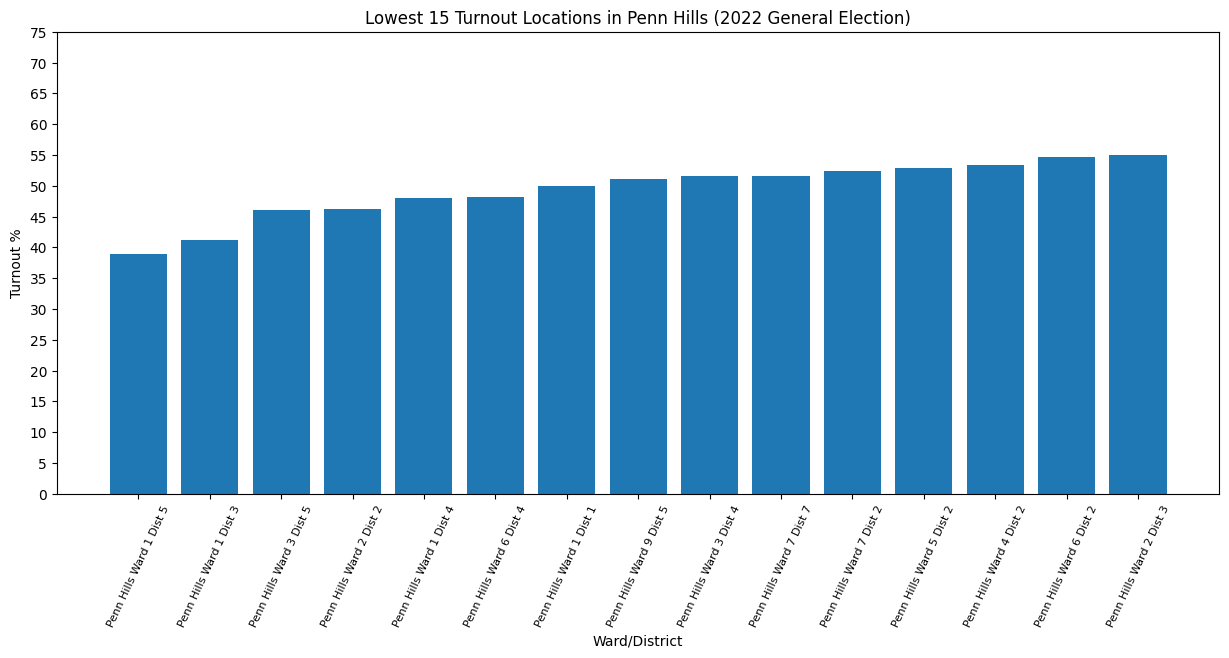

In [18]:
# graph the lowest 15 wards/districts in Penn Hills
lowest_ph_general22_turnout_y = lowest_ph_general22_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(lowest_ph_general22_turnout['County'])), sorted(lowest_ph_general22_turnout_y, reverse=False), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Lowest 15 Turnout Locations in Penn Hills (2022 General Election)")
plt.xticks(range(len(lowest_ph_general22_turnout_y)), lowest_ph_general22_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
plt.show()

##### 15 Highest Turnout Locations (Penn Hills)

In [19]:
# get the 15 highest turnouts from Penn Hills
highest_ph_general22_turnout = ph_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_ph_general22_turnout = highest_ph_general22_turnout.head(15)
highest_ph_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 9 Dist 1,524,283,107,7,397,75.76
1,Penn Hills Ward 3 Dist 1,744,311,199,6,516,69.35
2,Penn Hills Ward 8 Dist 3,535,250,113,6,369,68.97
3,Penn Hills Ward 8 Dist 2,566,297,87,5,389,68.73
4,Penn Hills Ward 2 Dist 4,583,237,158,5,400,68.61
5,Penn Hills Ward 5 Dist 4,602,273,133,6,412,68.44
6,Penn Hills Ward 8 Dist 4,630,283,141,6,430,68.25
7,Penn Hills Ward 9 Dist 4,596,292,109,4,405,67.95
8,Penn Hills Ward 5 Dist 5,532,252,88,14,354,66.54
9,Penn Hills Ward 8 Dist 6,474,214,97,3,314,66.24


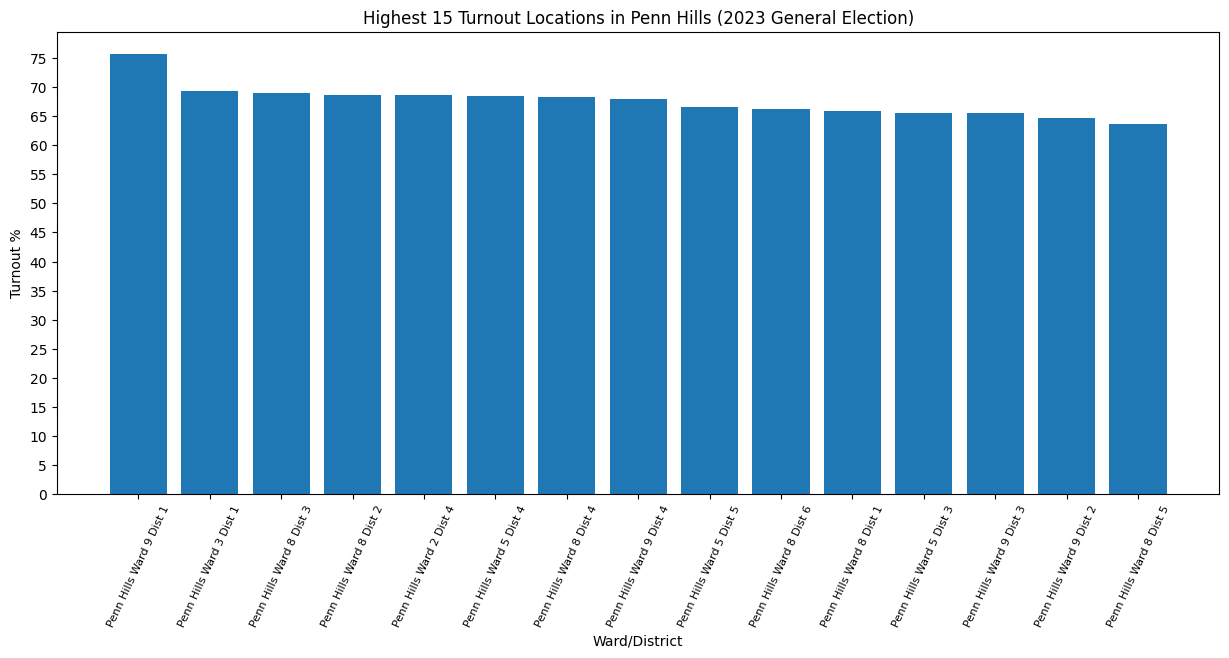

In [20]:
# graph the highest 15 wards/districts in Penn Hills
highest_ph_general22_turnout_y = highest_ph_general22_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(highest_ph_general22_turnout['County'])), sorted(highest_ph_general22_turnout_y, reverse=True), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Highest 15 Turnout Locations in Penn Hills (2023 General Election)")
plt.xticks(range(len(highest_ph_general22_turnout_y)), highest_ph_general22_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
plt.show()

##### Average Turnout (Penn Hills)

In [21]:
# get the average turnout for all of Penn Hills
avg_ph_general22_turnout = ph_general22_turnout['Voter Turnout'].mean()
print("Average turnout (HD32 Special - Penn Hills): " + str(avg_ph_general22_turnout))

Average turnout (HD32 Special - Penn Hills): 58.8


### HD32 2023 Special Election **(McAndrew v. Walker)**

In [22]:
# get only the rows that have 'hd32_special23_detail.xls' as the Filename
hd32_special_turnout = turnouts[turnouts['Filename'] == 'hd32_special23_detail.xls']
hd32_special_turnout = hd32_special_turnout.drop('Filename', axis=1)
hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,843,210,115,3,328,38.91
1,Oakmont Dist 2,1038,187,160,2,349,33.62
2,Oakmont Dist 3,750,161,79,3,243,32.40
3,Oakmont Dist 4,849,156,96,1,253,29.80
4,Oakmont Dist 5,645,128,65,2,195,30.23
...,...,...,...,...,...,...,...
64,Plum Dist 21,423,72,37,0,109,25.77
65,Verona Dist 1,494,69,41,1,111,22.47
66,Verona Dist 2,561,102,50,0,152,27.09
67,Verona Dist 3,571,104,53,2,159,27.85


#### HD32

##### 15 Lowest Turnout Locations (HD32)

In [23]:
# display the 15 wards/districts with the lowest turnout across all HD32
lowest10_hd32_special_turnout = hd32_special_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest10_hd32_special_turnout = lowest10_hd32_special_turnout.head(15)
lowest10_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,416,27,37,0,64,15.38
1,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43
2,Penn Hills Ward 2 Dist 2,692,57,71,0,128,18.50
3,Penn Hills Ward 5 Dist 2,584,60,58,0,118,20.21
4,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27
5,Penn Hills Ward 6 Dist 4,536,48,63,2,113,21.08
6,Verona Dist 1,494,69,41,1,111,22.47
7,Penn Hills Ward 2 Dist 1,675,55,95,5,155,22.96
8,Plum Dist 19,2062,253,224,0,477,23.13
9,Plum Dist 2,622,87,57,1,145,23.31


##### 15 Highest Turnout Locations (HD32)

In [24]:
# display the top 15 wards/districts with the highest turnout across all HD32
top10_hd32_special_turnout = hd32_special_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top10_hd32_special_turnout = top10_hd32_special_turnout.head(15)
top10_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,843,210,115,3,328,38.91
1,Penn Hills Ward 9 Dist 4,583,133,86,1,220,37.74
2,Penn Hills Ward 9 Dist 1,513,100,86,1,187,36.45
3,Penn Hills Ward 3 Dist 1,726,138,124,1,263,36.23
4,Penn Hills Ward 2 Dist 4,560,78,123,1,202,36.07
5,Plum Dist 3,1008,177,168,8,353,35.02
6,Penn Hills Ward 8 Dist 3,514,87,87,1,175,34.05
7,Oakmont Dist 2,1038,187,160,2,349,33.62
8,Penn Hills Ward 6 Dist 3,497,80,84,1,165,33.20
9,Penn Hills Ward 8 Dist 6,464,84,69,0,153,32.97


#### Penn Hills

In [25]:
# get only Penn Hills wards/districts
ph_hd32_special_turnout = hd32_special_turnout[hd32_special_turnout['County'].str.contains("Penn Hills")]
ph_hd32_special_turnout.reset_index(drop=True)
ph_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
6,Penn Hills Ward 1 Dist 1,684,56,122,2,180,26.32
7,Penn Hills Ward 1 Dist 2,710,76,108,0,184,25.92
8,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27
9,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43
10,Penn Hills Ward 1 Dist 5,188,17,27,0,44,23.40
11,Penn Hills Ward 2 Dist 1,675,55,95,5,155,22.96
12,Penn Hills Ward 2 Dist 2,692,57,71,0,128,18.50
13,Penn Hills Ward 2 Dist 3,793,93,90,2,185,23.33
14,Penn Hills Ward 2 Dist 4,560,78,123,1,202,36.07
15,Penn Hills Ward 3 Dist 1,726,138,124,1,263,36.23


In [26]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_hd32_special_turnout = ph_hd32_special_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_hd32_special_turnout = lowest_ph_hd32_special_turnout.head(15)
lowest_ph_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,416,27,37,0,64,15.38
1,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43
2,Penn Hills Ward 2 Dist 2,692,57,71,0,128,18.50
3,Penn Hills Ward 5 Dist 2,584,60,58,0,118,20.21
4,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27
5,Penn Hills Ward 6 Dist 4,536,48,63,2,113,21.08
6,Penn Hills Ward 2 Dist 1,675,55,95,5,155,22.96
7,Penn Hills Ward 2 Dist 3,793,93,90,2,185,23.33
8,Penn Hills Ward 1 Dist 5,188,17,27,0,44,23.40
9,Penn Hills Ward 7 Dist 7,664,73,83,0,156,23.49


##### 15 Lowest Turnout Locations (Penn Hills)

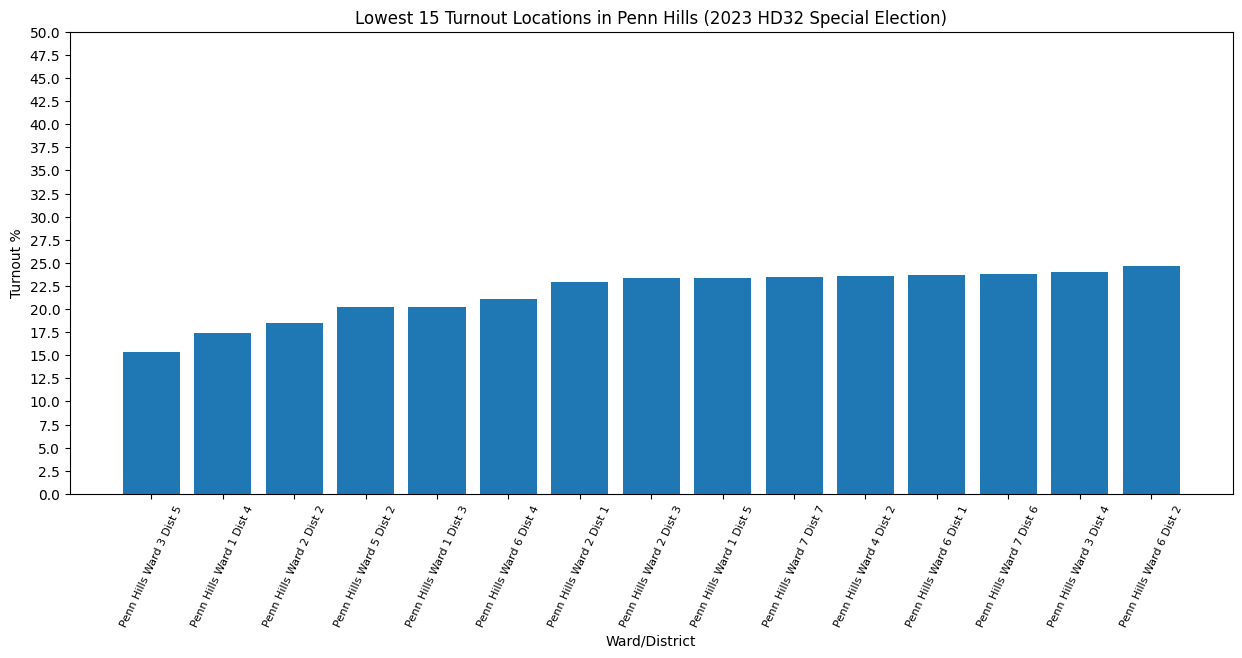

In [27]:
# graph the top 15 wards/districts in Penn Hills
lowest_ph_special_turnout_y = lowest_ph_hd32_special_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(lowest_ph_hd32_special_turnout['County'])), sorted(lowest_ph_special_turnout_y, reverse=False), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Lowest 15 Turnout Locations in Penn Hills (2023 HD32 Special Election)")
plt.xticks(range(len(lowest_ph_special_turnout_y)), lowest_ph_hd32_special_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50])
plt.show()

In [28]:
# get the top 15 from Penn Hills
top15_ph_hd32_special_turnout = ph_hd32_special_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top15_ph_hd32_special_turnout = top15_ph_hd32_special_turnout.head(15)
top15_ph_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 9 Dist 4,583,133,86,1,220,37.74
1,Penn Hills Ward 9 Dist 1,513,100,86,1,187,36.45
2,Penn Hills Ward 3 Dist 1,726,138,124,1,263,36.23
3,Penn Hills Ward 2 Dist 4,560,78,123,1,202,36.07
4,Penn Hills Ward 8 Dist 3,514,87,87,1,175,34.05
5,Penn Hills Ward 6 Dist 3,497,80,84,1,165,33.20
6,Penn Hills Ward 8 Dist 6,464,84,69,0,153,32.97
7,Penn Hills Ward 9 Dist 2,546,87,87,1,175,32.05
8,Penn Hills Ward 9 Dist 5,290,42,48,2,92,31.72
9,Penn Hills Ward 6 Dist 6,547,86,85,2,173,31.63


##### 15 Highest Turnout Locations (Penn Hills)

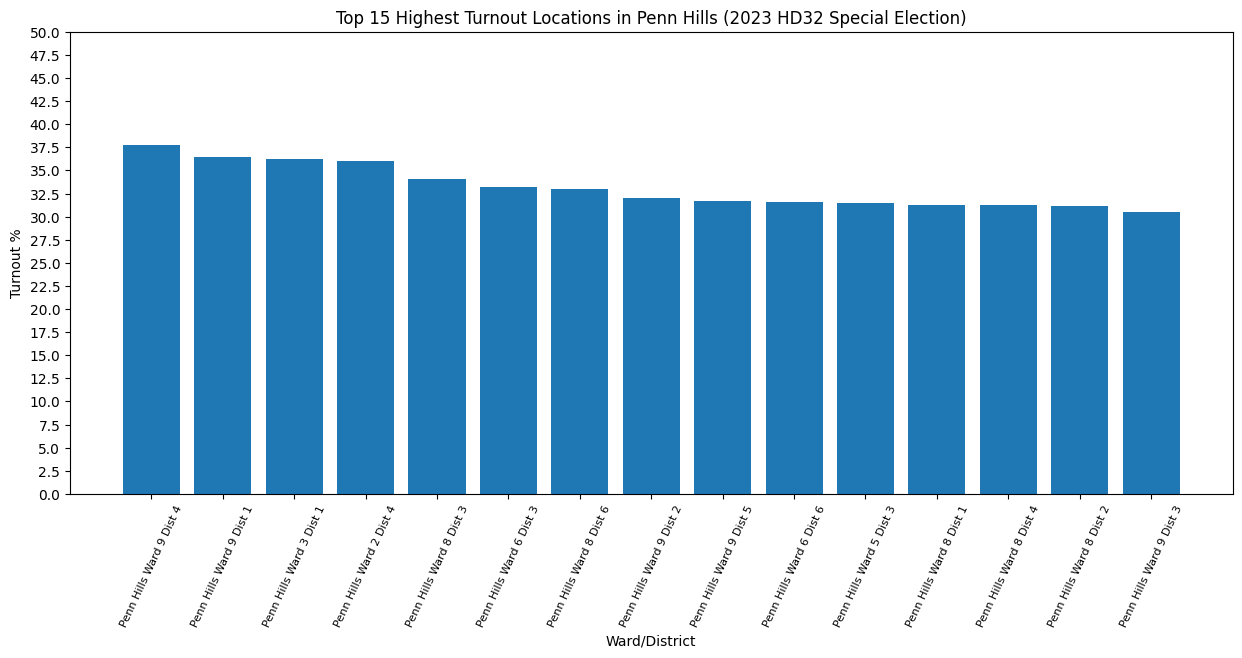

In [29]:
# graph the top 15 wards/districts in Penn Hills
top10_ph_special_turnout_y = top15_ph_hd32_special_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(top15_ph_hd32_special_turnout['County'])), sorted(top10_ph_special_turnout_y, reverse=True), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Top 15 Highest Turnout Locations in Penn Hills (2023 HD32 Special Election)")
plt.xticks(range(len(top10_ph_special_turnout_y)), top15_ph_hd32_special_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50])
plt.show()

##### Average Turnout (Penn Hills)

In [30]:
# get the average turnout for all of Penn Hills
avg_ph_special_turnout = ph_hd32_special_turnout['Voter Turnout'].mean()
print("Average turnout (HD32 Special - Penn Hills): " + str(avg_ph_special_turnout))

Average turnout (HD32 Special - Penn Hills): 27.5216


### 2023 General Election

In [31]:
# get only the rows that have 'hd32_special23_detail.xls' as the Filename
allegheny_general23_turnout = turnouts[turnouts['Filename'] == 'allegheny_general23_detail.xls']
allegheny_general23_turnout = allegheny_general23_turnout.drop('Filename', axis=1).reset_index(drop=True)
allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Aleppo,1335,481,274,1,756,56.63
1,Aspinwall Dist 1,833,419,76,3,498,59.78
2,Aspinwall Dist 2,567,235,64,2,301,53.09
3,Aspinwall Dist 3,813,388,94,2,484,59.53
4,Avalon Ward 1,1030,267,89,4,360,34.95
...,...,...,...,...,...,...,...
1320,Wilkinsburg Ward 3 Dist 5,958,177,80,6,263,27.45
1321,Wilkinsburg Ward 3 Dist 6,476,81,27,3,111,23.32
1322,Wilmerding Dist 1,463,47,33,2,82,17.71
1323,Wilmerding Dist 2,655,111,60,3,174,26.56


#### Allegheny County

##### 15 Lowest Turnouts (Allegheny County)

In [32]:
# display the 15 wards/districts with the lowest turnout across Allegheny County
lowest15_allegheny_general23_turnout = allegheny_general23_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_allegheny_general23_turnout = lowest15_allegheny_general23_turnout.head(15)
lowest15_allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,McKeesport Ward 1,10,0,0,0,0,0.00
1,Pittsburgh Ward 13 Dist 18,232,21,0,0,21,9.05
2,McKees Rocks Ward 1 Dist 1,245,18,5,0,23,9.39
3,West Mifflin Dist 4,393,30,8,0,38,9.67
4,Pittsburgh Ward 1 Dist 1,3015,177,112,4,293,9.72
5,Pittsburgh Ward 26 Dist 5,447,33,11,0,44,9.84
6,Pittsburgh Ward 16 Dist 8,175,14,3,1,18,10.29
7,Pittsburgh Ward 4 Dist 8,2351,231,6,18,255,10.85
8,Pittsburgh Ward 14 Dist 7,2742,232,63,7,302,11.01
9,Pittsburgh Ward 26 Dist 6,357,28,10,3,41,11.48


##### 15 Highest Turnouts (Allegheny County)

In [33]:
# display the top 15 wards/districts with the highest turnout across Allegheny County
top15_allegheny_general23_turnout = allegheny_general23_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top15_allegheny_general23_turnout = top15_allegheny_general23_turnout.head(15)
top15_allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Pittsburgh Ward 11 Dist 10,573,249,119,3,371,64.75
1,Thornburg,394,217,32,0,249,63.20
2,Pittsburgh Ward 14 Dist 19,600,276,96,6,378,63.00
3,Forest Hills Dist 1,604,260,116,1,377,62.42
4,Ben Avon Ht,337,171,39,0,210,62.31
5,O'Hara Ward 4 Dist 2,603,229,138,4,371,61.53
6,Pittsburgh Ward 14 Dist 16,468,190,94,3,287,61.32
7,Pittsburgh Ward 14 Dist 17,464,195,85,4,284,61.21
8,Mt Lebanon Ward 5 Dist 5,640,258,131,1,390,60.94
9,Pittsburgh Ward 10 Dist 10,581,256,97,1,354,60.93


#### Penn Hills

In [34]:
# get only Penn Hills wards/districts
ph_general23_turnout = allegheny_general23_turnout[allegheny_general23_turnout['County'].str.contains("Penn Hills")]
ph_general23_turnout.reset_index(drop=True)
ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
525,Penn Hills Ward 1 Dist 1,685,120,116,3,239,34.89
526,Penn Hills Ward 1 Dist 2,704,157,111,2,270,38.35
527,Penn Hills Ward 1 Dist 3,451,57,53,1,111,24.61
528,Penn Hills Ward 1 Dist 4,298,49,33,2,84,28.19
529,Penn Hills Ward 1 Dist 5,197,31,30,0,61,30.96
530,Penn Hills Ward 2 Dist 1,680,133,96,2,231,33.97
531,Penn Hills Ward 2 Dist 2,693,135,68,4,207,29.87
532,Penn Hills Ward 2 Dist 3,815,167,103,2,272,33.37
533,Penn Hills Ward 2 Dist 4,563,152,112,7,271,48.13
534,Penn Hills Ward 3 Dist 1,732,202,128,1,331,45.22


In [35]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_general23_turnout = ph_general23_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_general23_turnout = lowest_ph_general23_turnout.head(15)
lowest_ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,405,60,34,0,94,23.21
1,Penn Hills Ward 1 Dist 3,451,57,53,1,111,24.61
2,Penn Hills Ward 5 Dist 2,579,90,56,4,150,25.91
3,Penn Hills Ward 7 Dist 7,656,101,80,0,181,27.59
4,Penn Hills Ward 1 Dist 4,298,49,33,2,84,28.19
5,Penn Hills Ward 6 Dist 4,530,105,51,2,158,29.81
6,Penn Hills Ward 2 Dist 2,693,135,68,4,207,29.87
7,Penn Hills Ward 4 Dist 2,701,129,82,0,211,30.10
8,Penn Hills Ward 3 Dist 4,757,106,122,0,228,30.12
9,Penn Hills Ward 6 Dist 1,545,109,58,0,167,30.64


##### 15 Lowest Turnout Locations (Penn Hills)

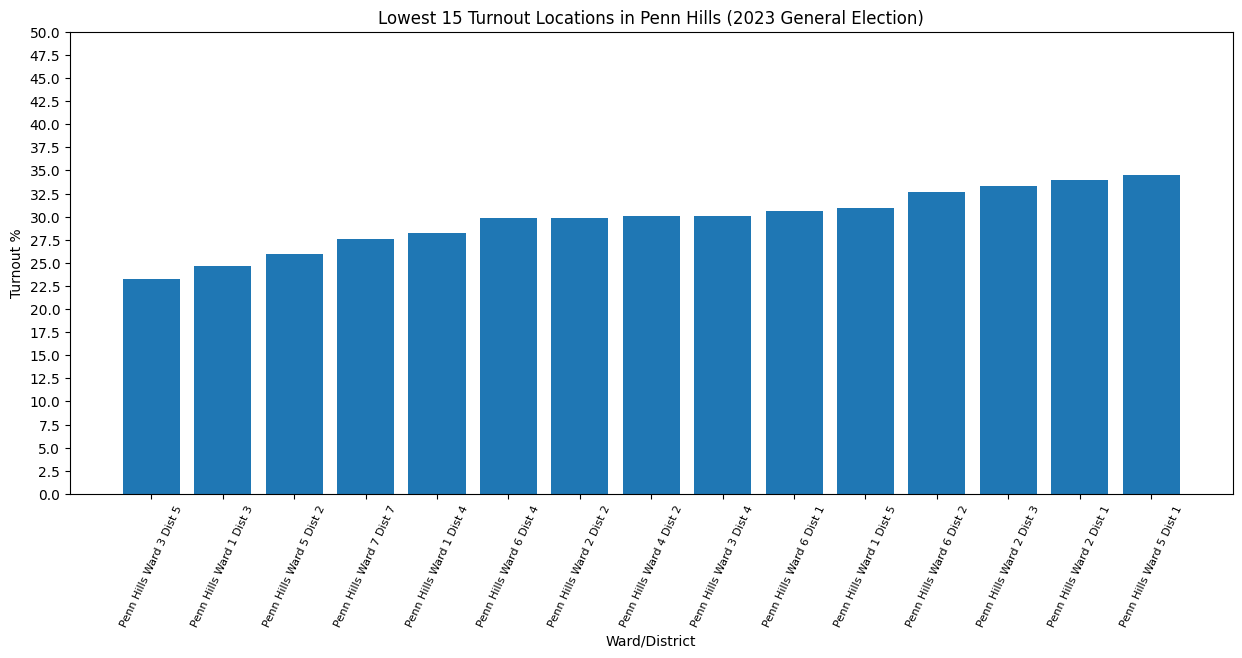

In [36]:
# graph the lowest 15 wards/districts in Penn Hills
lowest_ph_general23_turnout_y = lowest_ph_general23_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(lowest_ph_general23_turnout['County'])), sorted(lowest_ph_general23_turnout_y, reverse=False), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Lowest 15 Turnout Locations in Penn Hills (2023 General Election)")
plt.xticks(range(len(lowest_ph_general23_turnout_y)), lowest_ph_general23_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50])
plt.show()

In [37]:
# get the 15 highest turnouts from Penn Hills
highest_ph_general23_turnout = ph_general23_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_ph_general23_turnout = highest_ph_general23_turnout.head(15)
highest_ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 2 Dist 4,563,152,112,7,271,48.13
1,Penn Hills Ward 9 Dist 1,503,163,79,0,242,48.11
2,Penn Hills Ward 8 Dist 2,531,186,61,1,248,46.70
3,Penn Hills Ward 8 Dist 3,513,159,80,0,239,46.59
4,Penn Hills Ward 9 Dist 4,587,190,78,0,268,45.66
5,Penn Hills Ward 8 Dist 4,603,163,109,1,273,45.27
6,Penn Hills Ward 3 Dist 1,732,202,128,1,331,45.22
7,Penn Hills Ward 6 Dist 3,494,146,72,5,223,45.14
8,Penn Hills Ward 8 Dist 6,458,135,66,0,201,43.89
9,Penn Hills Ward 9 Dist 2,548,155,82,0,237,43.25


##### 15 Highest Turnout Locations (Penn Hills)

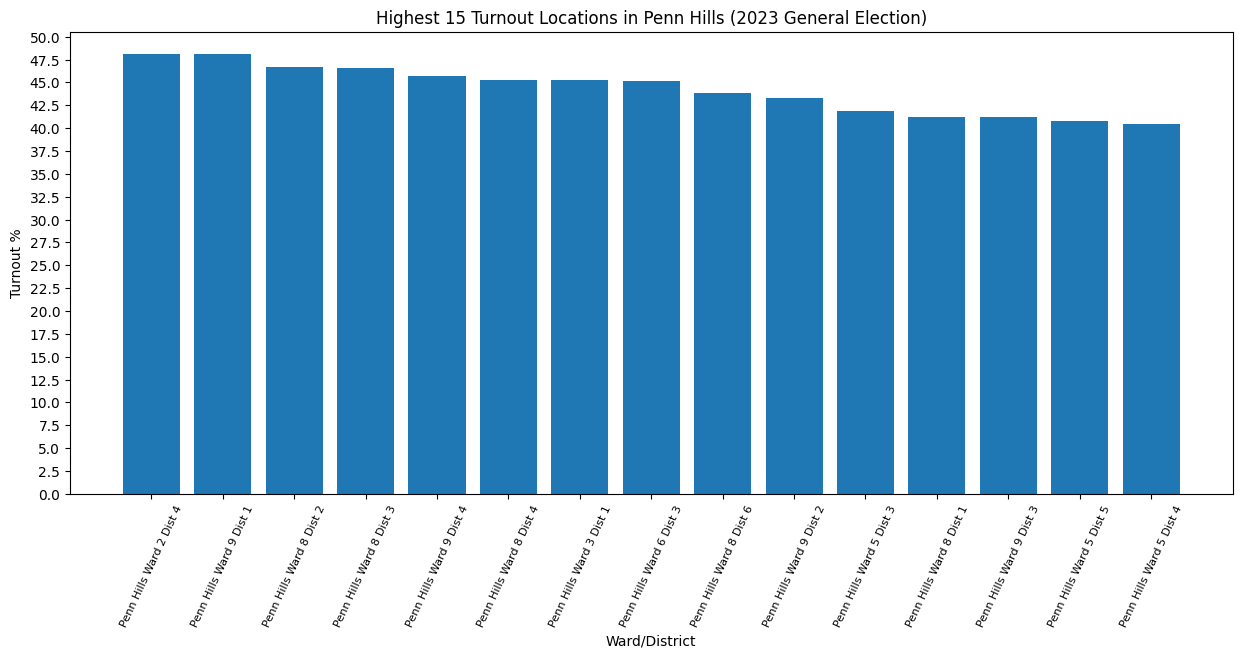

In [38]:
# graph the highest 15 wards/districts in Penn Hills
highest_ph_general23_turnout_y = highest_ph_general23_turnout['Voter Turnout']
plt.figure(figsize=(15,6))
plt.bar(range(len(highest_ph_general23_turnout['County'])), sorted(highest_ph_general23_turnout_y, reverse=True), color = '#1f77b4', align='center')

plt.xlabel('Ward/District')
plt.ylabel('Turnout %')
plt.title("Highest 15 Turnout Locations in Penn Hills (2023 General Election)")
plt.xticks(range(len(highest_ph_general23_turnout_y)), highest_ph_general23_turnout['County'], rotation = 65, fontsize = 8)
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50])
plt.show()

##### Average Turnout (Penn Hills)

In [39]:
# get the average turnout for all of Penn Hills
avg_ph_general23_turnout = ph_general23_turnout['Voter Turnout'].mean()
print("Average turnout (HD32 Special - Penn Hills): " + str(avg_ph_general23_turnout))

Average turnout (HD32 Special - Penn Hills): 36.955


## Election Analysis

### HD32 2023 Special Election

In [40]:
hd32_special_breakdown

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total
0,Oakmont Dist 1,843,135,104,3,242,75,11,0,86,0,0,0,0,328
1,Oakmont Dist 2,1038,102,132,2,236,84,28,0,112,1,0,0,1,349
2,Oakmont Dist 3,750,109,71,3,183,52,7,0,59,0,1,0,1,243
3,Oakmont Dist 4,849,96,87,0,183,60,9,1,70,0,0,0,0,253
4,Oakmont Dist 5,645,92,55,2,149,36,8,0,44,0,1,0,1,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Plum Dist 21,423,23,26,0,49,49,11,0,60,0,0,0,0,109
65,Verona Dist 1,494,54,39,1,94,14,2,0,16,1,0,0,1,111
66,Verona Dist 2,561,69,48,0,117,32,2,0,34,1,0,0,1,152
67,Verona Dist 3,571,66,45,2,113,37,8,0,45,1,0,0,1,159


#### Penn Hills

In [41]:
# get only Penn Hills wards/districts
ph_special23_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Penn Hills")]
ph_special23_breakdown = ph_special23_breakdown.reset_index(drop=True)
ph_special23_breakdown.head(10)

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total
0,Penn Hills Ward 1 Dist 1,684,50,119,2,171,6,2,0,8,0,0,0,0,179
1,Penn Hills Ward 1 Dist 2,710,69,102,0,171,7,6,0,13,0,0,0,0,184
2,Penn Hills Ward 1 Dist 3,449,30,54,4,88,2,1,0,3,0,0,0,0,91
3,Penn Hills Ward 1 Dist 4,304,16,37,0,53,0,0,0,0,0,0,0,0,53
4,Penn Hills Ward 1 Dist 5,188,14,25,0,39,2,1,0,3,1,1,0,2,44
5,Penn Hills Ward 2 Dist 1,675,47,91,5,143,7,3,0,10,1,1,0,2,155
6,Penn Hills Ward 2 Dist 2,692,48,65,0,113,7,4,0,11,2,1,0,3,127
7,Penn Hills Ward 2 Dist 3,793,78,82,2,162,14,7,0,21,1,1,0,2,185
8,Penn Hills Ward 2 Dist 4,560,69,115,1,185,7,7,0,14,2,1,0,3,202
9,Penn Hills Ward 3 Dist 1,726,93,108,0,201,45,12,0,57,0,2,1,3,261
